In [1]:
import pandas as pd
import numpy as np
from pandas import Series , DataFrame
import matplotlib.pyplot as plt
import seaborn as sns



from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm


from sympy import symbols, diff
from math import log


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline

In [2]:
boston_data= load_boston()

In [3]:
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
dir(boston_data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
boston_data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
data =DataFrame(boston_data.data , columns=boston_data.feature_names)

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
dtype: int64

In [9]:
data['Price']=boston_data.target

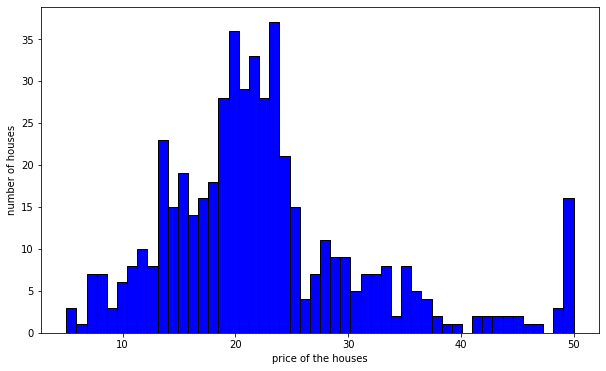

In [10]:
#creating the Histogram 

plt.figure(figsize=[10,6])
plt.hist(data['Price'] , bins=50 ,ec='black' ,color='blue')
plt.xlabel("price of the houses")
plt.ylabel("number of houses")
plt.show()

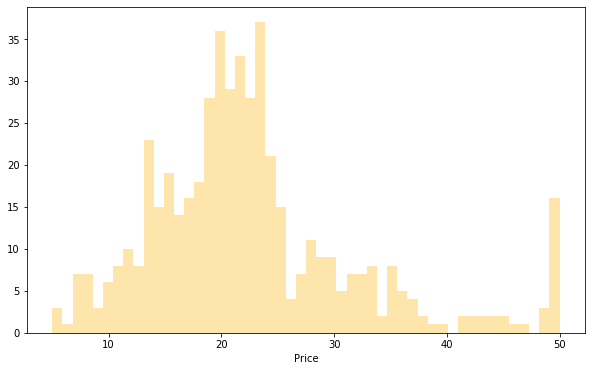

In [11]:
plt.figure(figsize=(10, 6))
sns.distplot(data['Price'], bins=50,kde=False, color='#fbc02d')
plt.show()

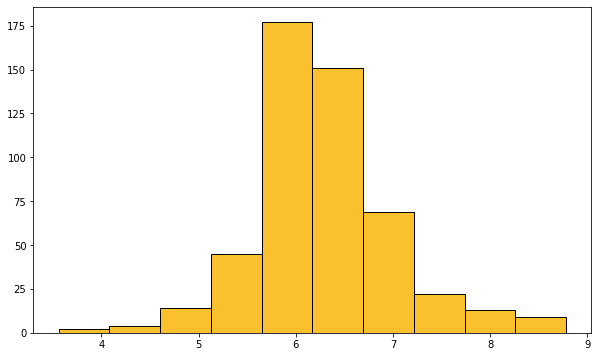

In [12]:
# hist for number of rooms 
plt.figure(figsize=(10, 6))
plt.hist(data['RM'],  ec='black', color='#fbc02d')
plt.show()


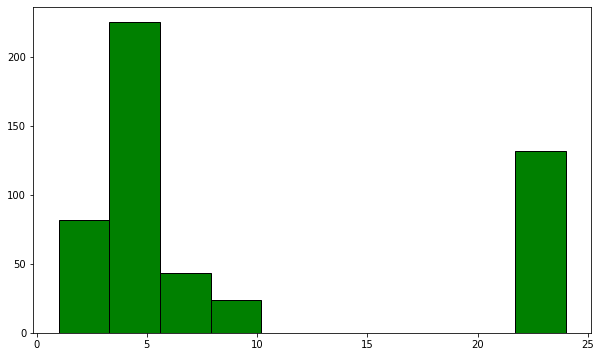

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(data['RAD'],  ec='black', color='green')
plt.show()


In [14]:
data['RAD'].sum()

4832.0

In [15]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [16]:
#bar charts  for RAD

frequency= data['RAD'].value_counts()
frequency

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

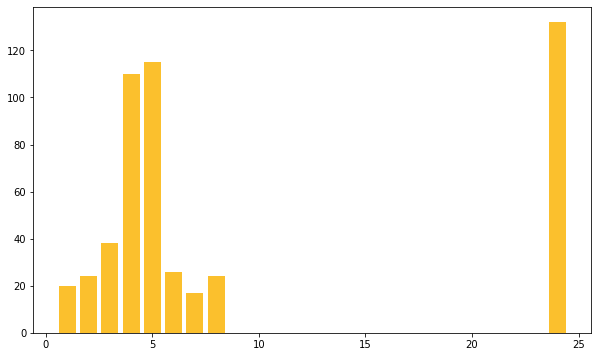

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(x=frequency.index, height=frequency, color='#fbc02d')
plt.show()


In [18]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [19]:
data['Price'].corr(data['RM'])

0.6953599470715394

In [20]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
# finding correlation 

data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [22]:
# finding corr for single feature
data['RAD'].corr(data['Price'])

-0.381626230639778

In [23]:
mask =np.zeros_like(data.corr())
indent=np.triu_indices_from(mask)
mask[indent]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

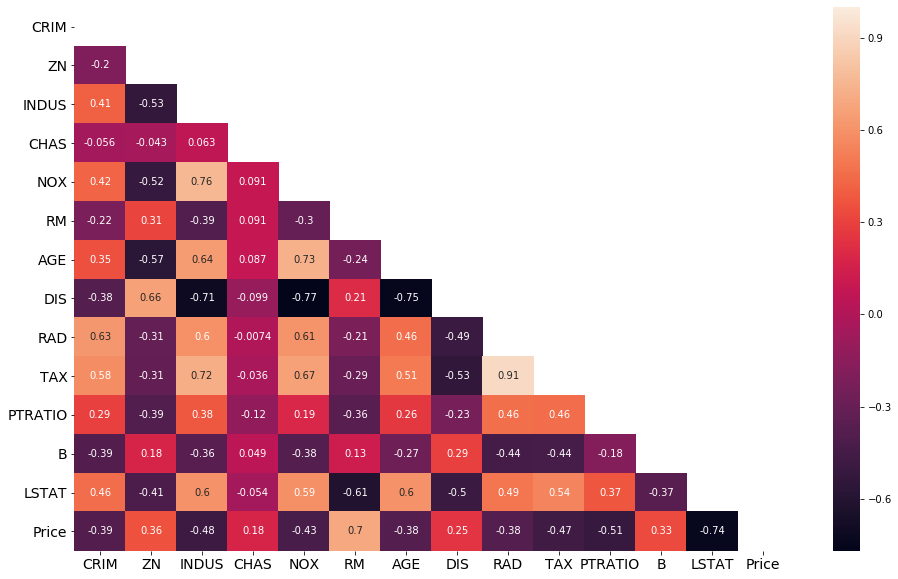

In [24]:
plt.figure(figsize=[16,10])
sns.heatmap(data.corr(),annot=True,mask=mask, annot_kws={"size":10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

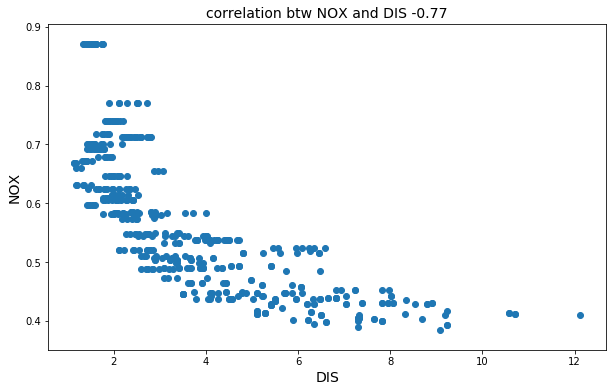

In [25]:
#map for the relationship between pollution and distance in your head
nox_corr=round(data['DIS'].corr(data['NOX']),2)
plt.figure(figsize=[10,6])
plt.scatter(x=data['DIS'] , y=data['NOX'])
plt.xlabel("DIS",fontsize=14 )
plt.ylabel("NOX",fontsize=14 )
plt.title(f'correlation btw NOX and DIS {nox_corr}', fontsize=14 )
plt.show()



<Figure size 720x432 with 0 Axes>

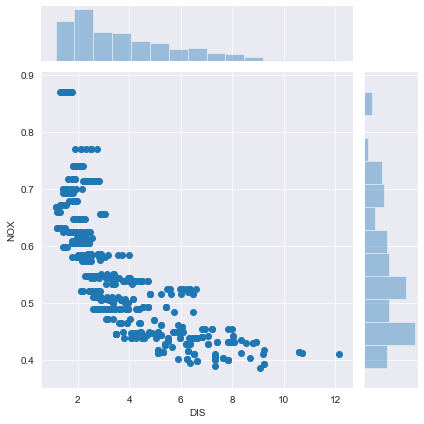

In [26]:
plt.figure(figsize=[10,6])
sns.set_color_codes('dark')
sns.set_style('darkgrid')
sns.jointplot(x=data['DIS'] , y=data['NOX'])
plt.show()

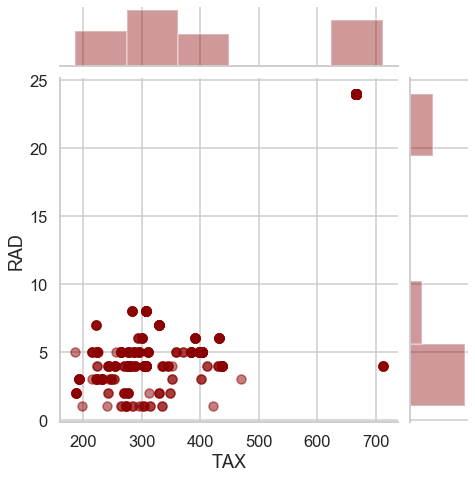

In [27]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], height=7, color='darkred', joint_kws={'alpha':0.5})
plt.show()

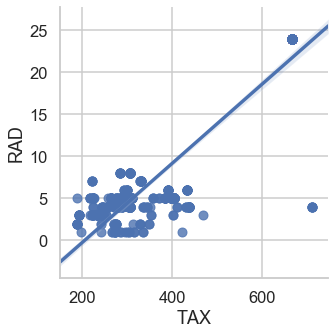

In [28]:
sns.lmplot(x='TAX',y='RAD', data=data)

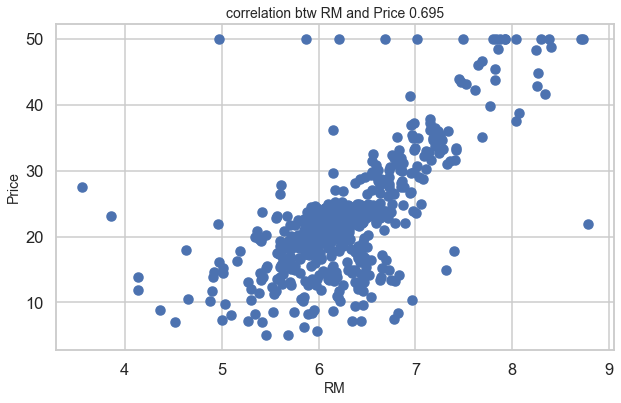

In [29]:
# scatter plot btw house price and RM

nox_corr=round(data['RM'].corr(data['Price']),3)
plt.figure(figsize=[10,6])
plt.scatter(x=data['RM'] , y=data['Price'])
plt.xlabel("RM",fontsize=14 )
plt.ylabel("Price",fontsize=14 )
plt.title(f'correlation btw RM and Price {nox_corr}', fontsize=14 )
plt.show()

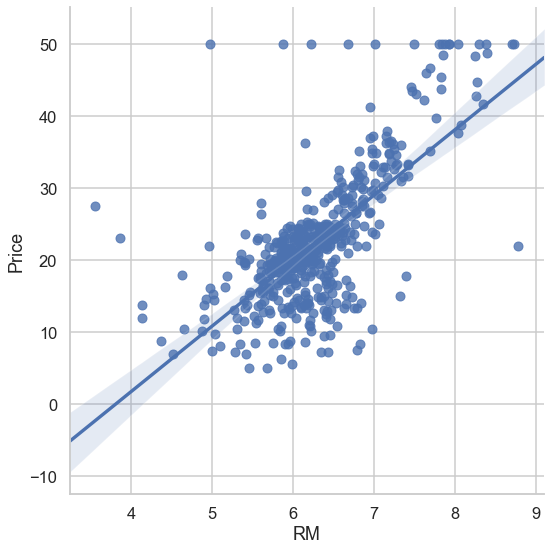

In [30]:
# reg plot 

sns.lmplot(x='RM' , y='Price' , data=data , height=8)

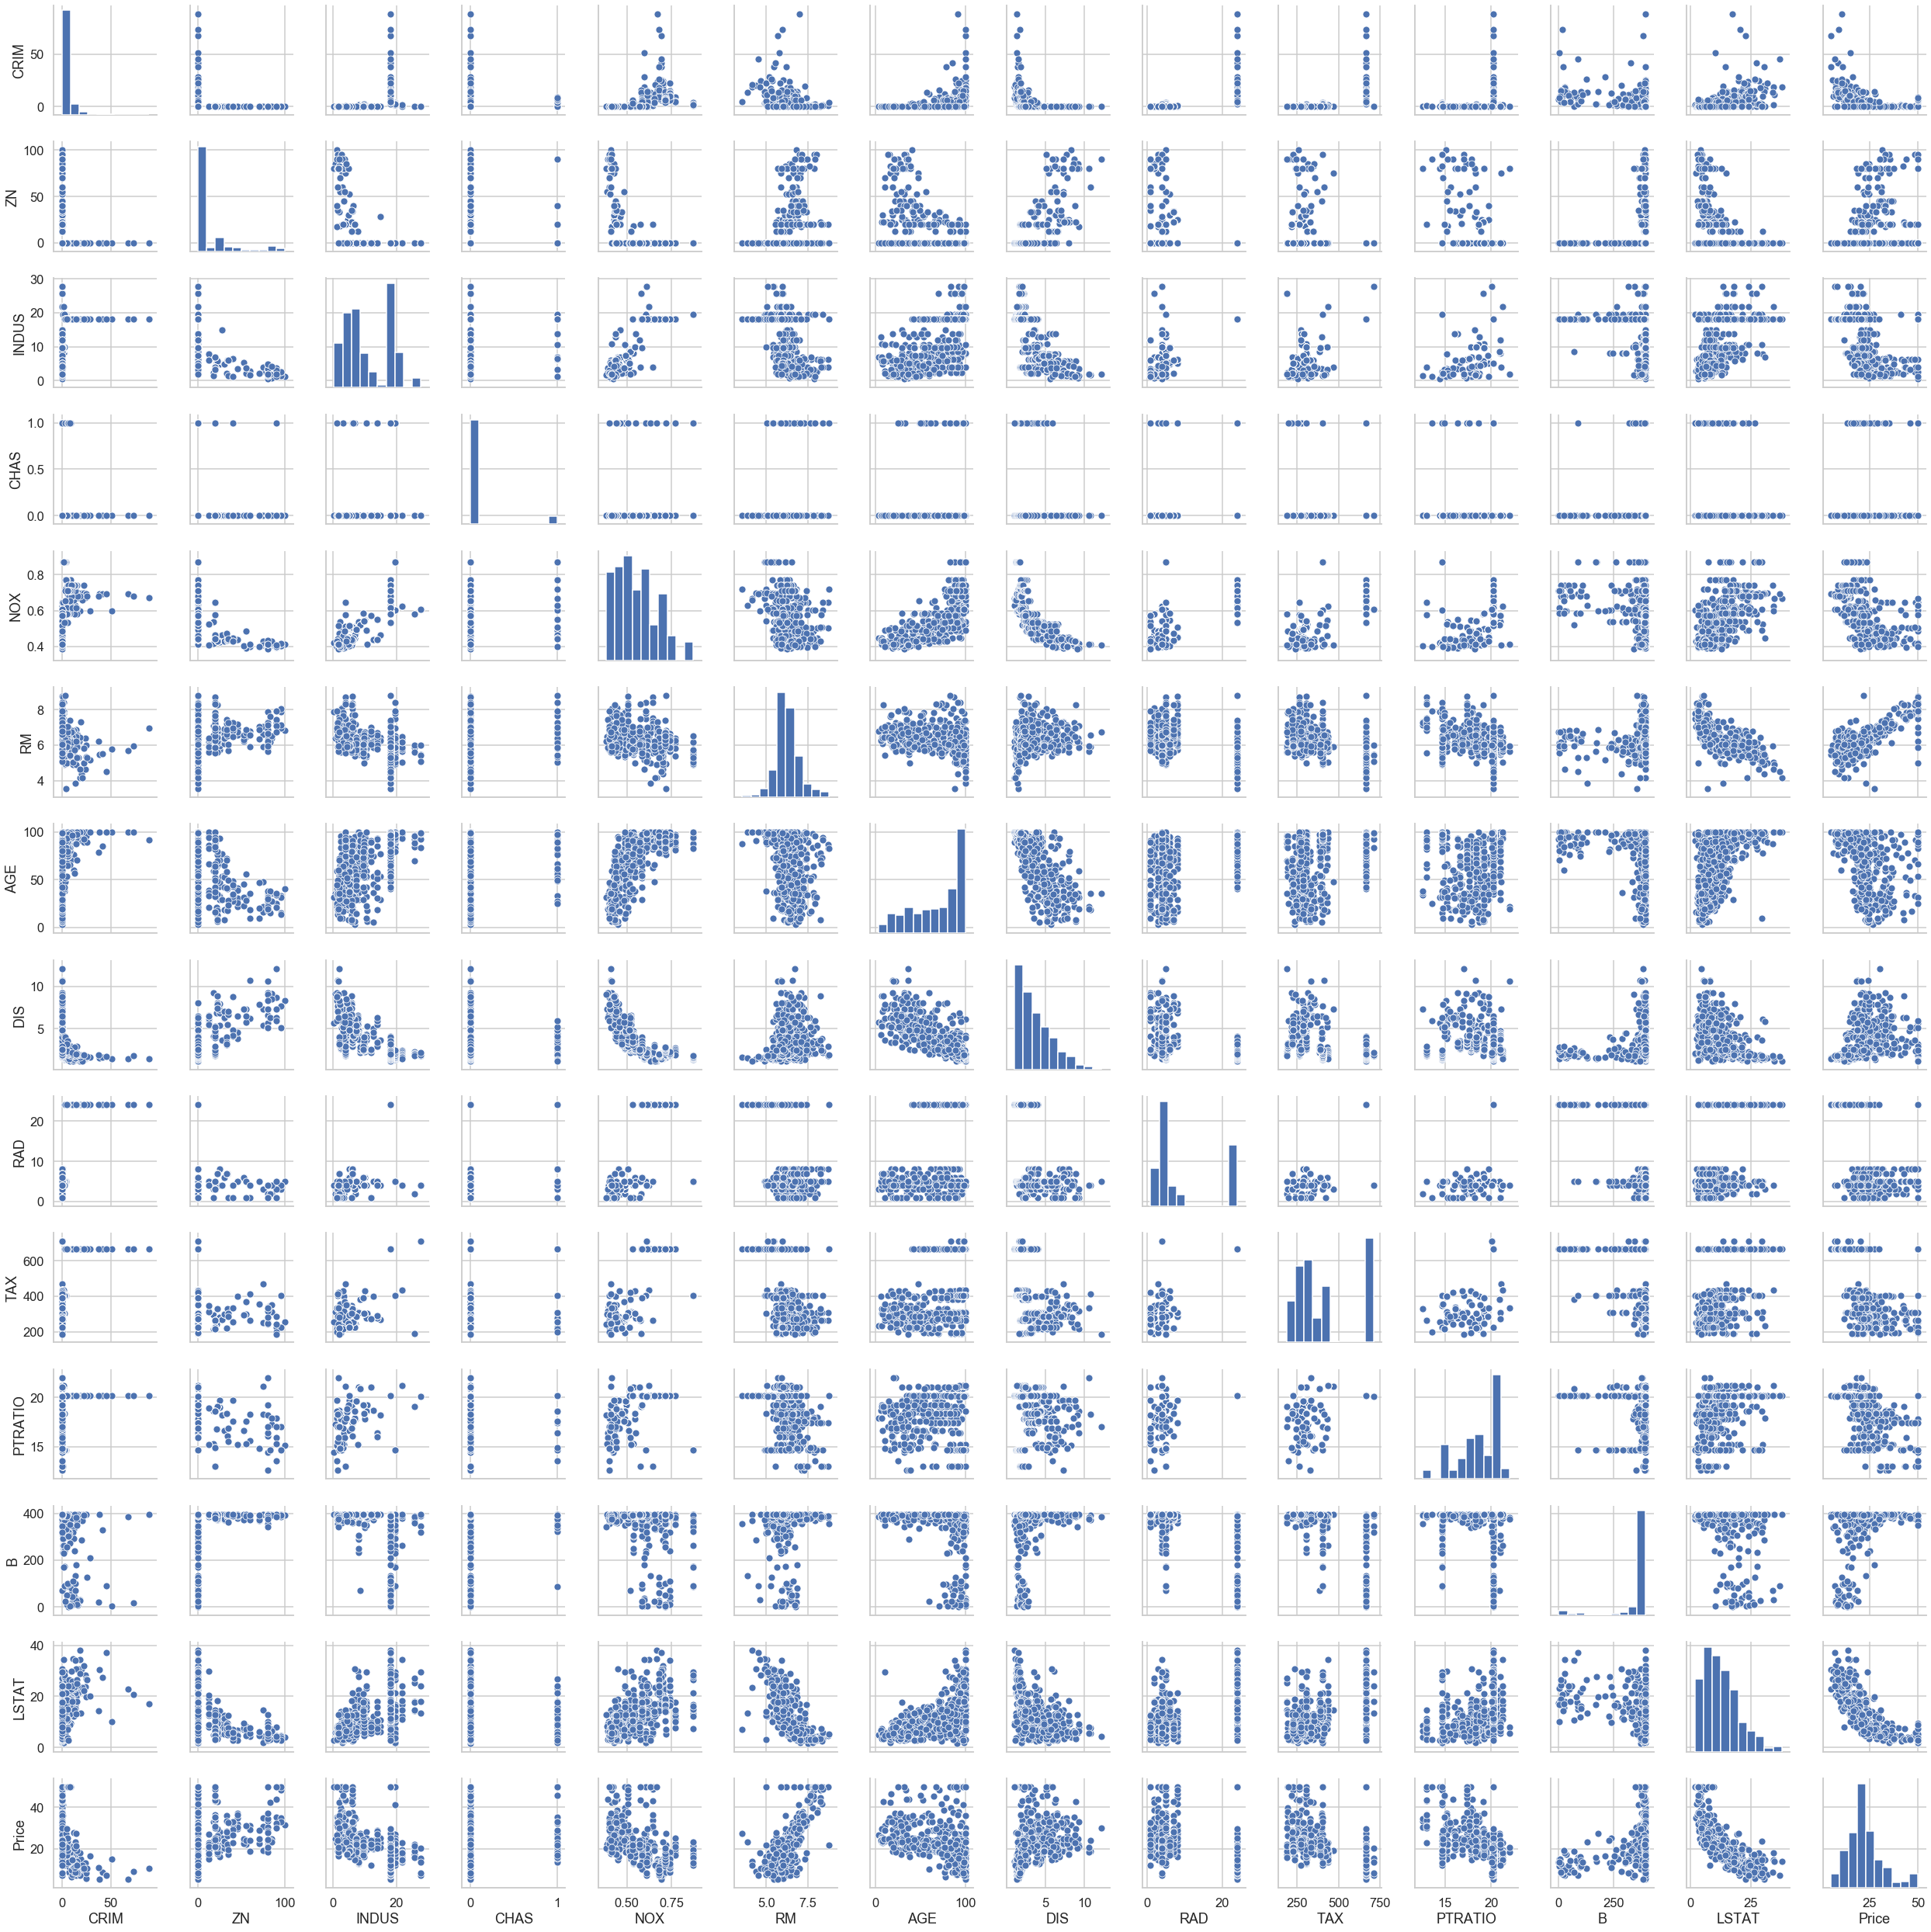

In [31]:
sns.pairplot(data)
plt.show()

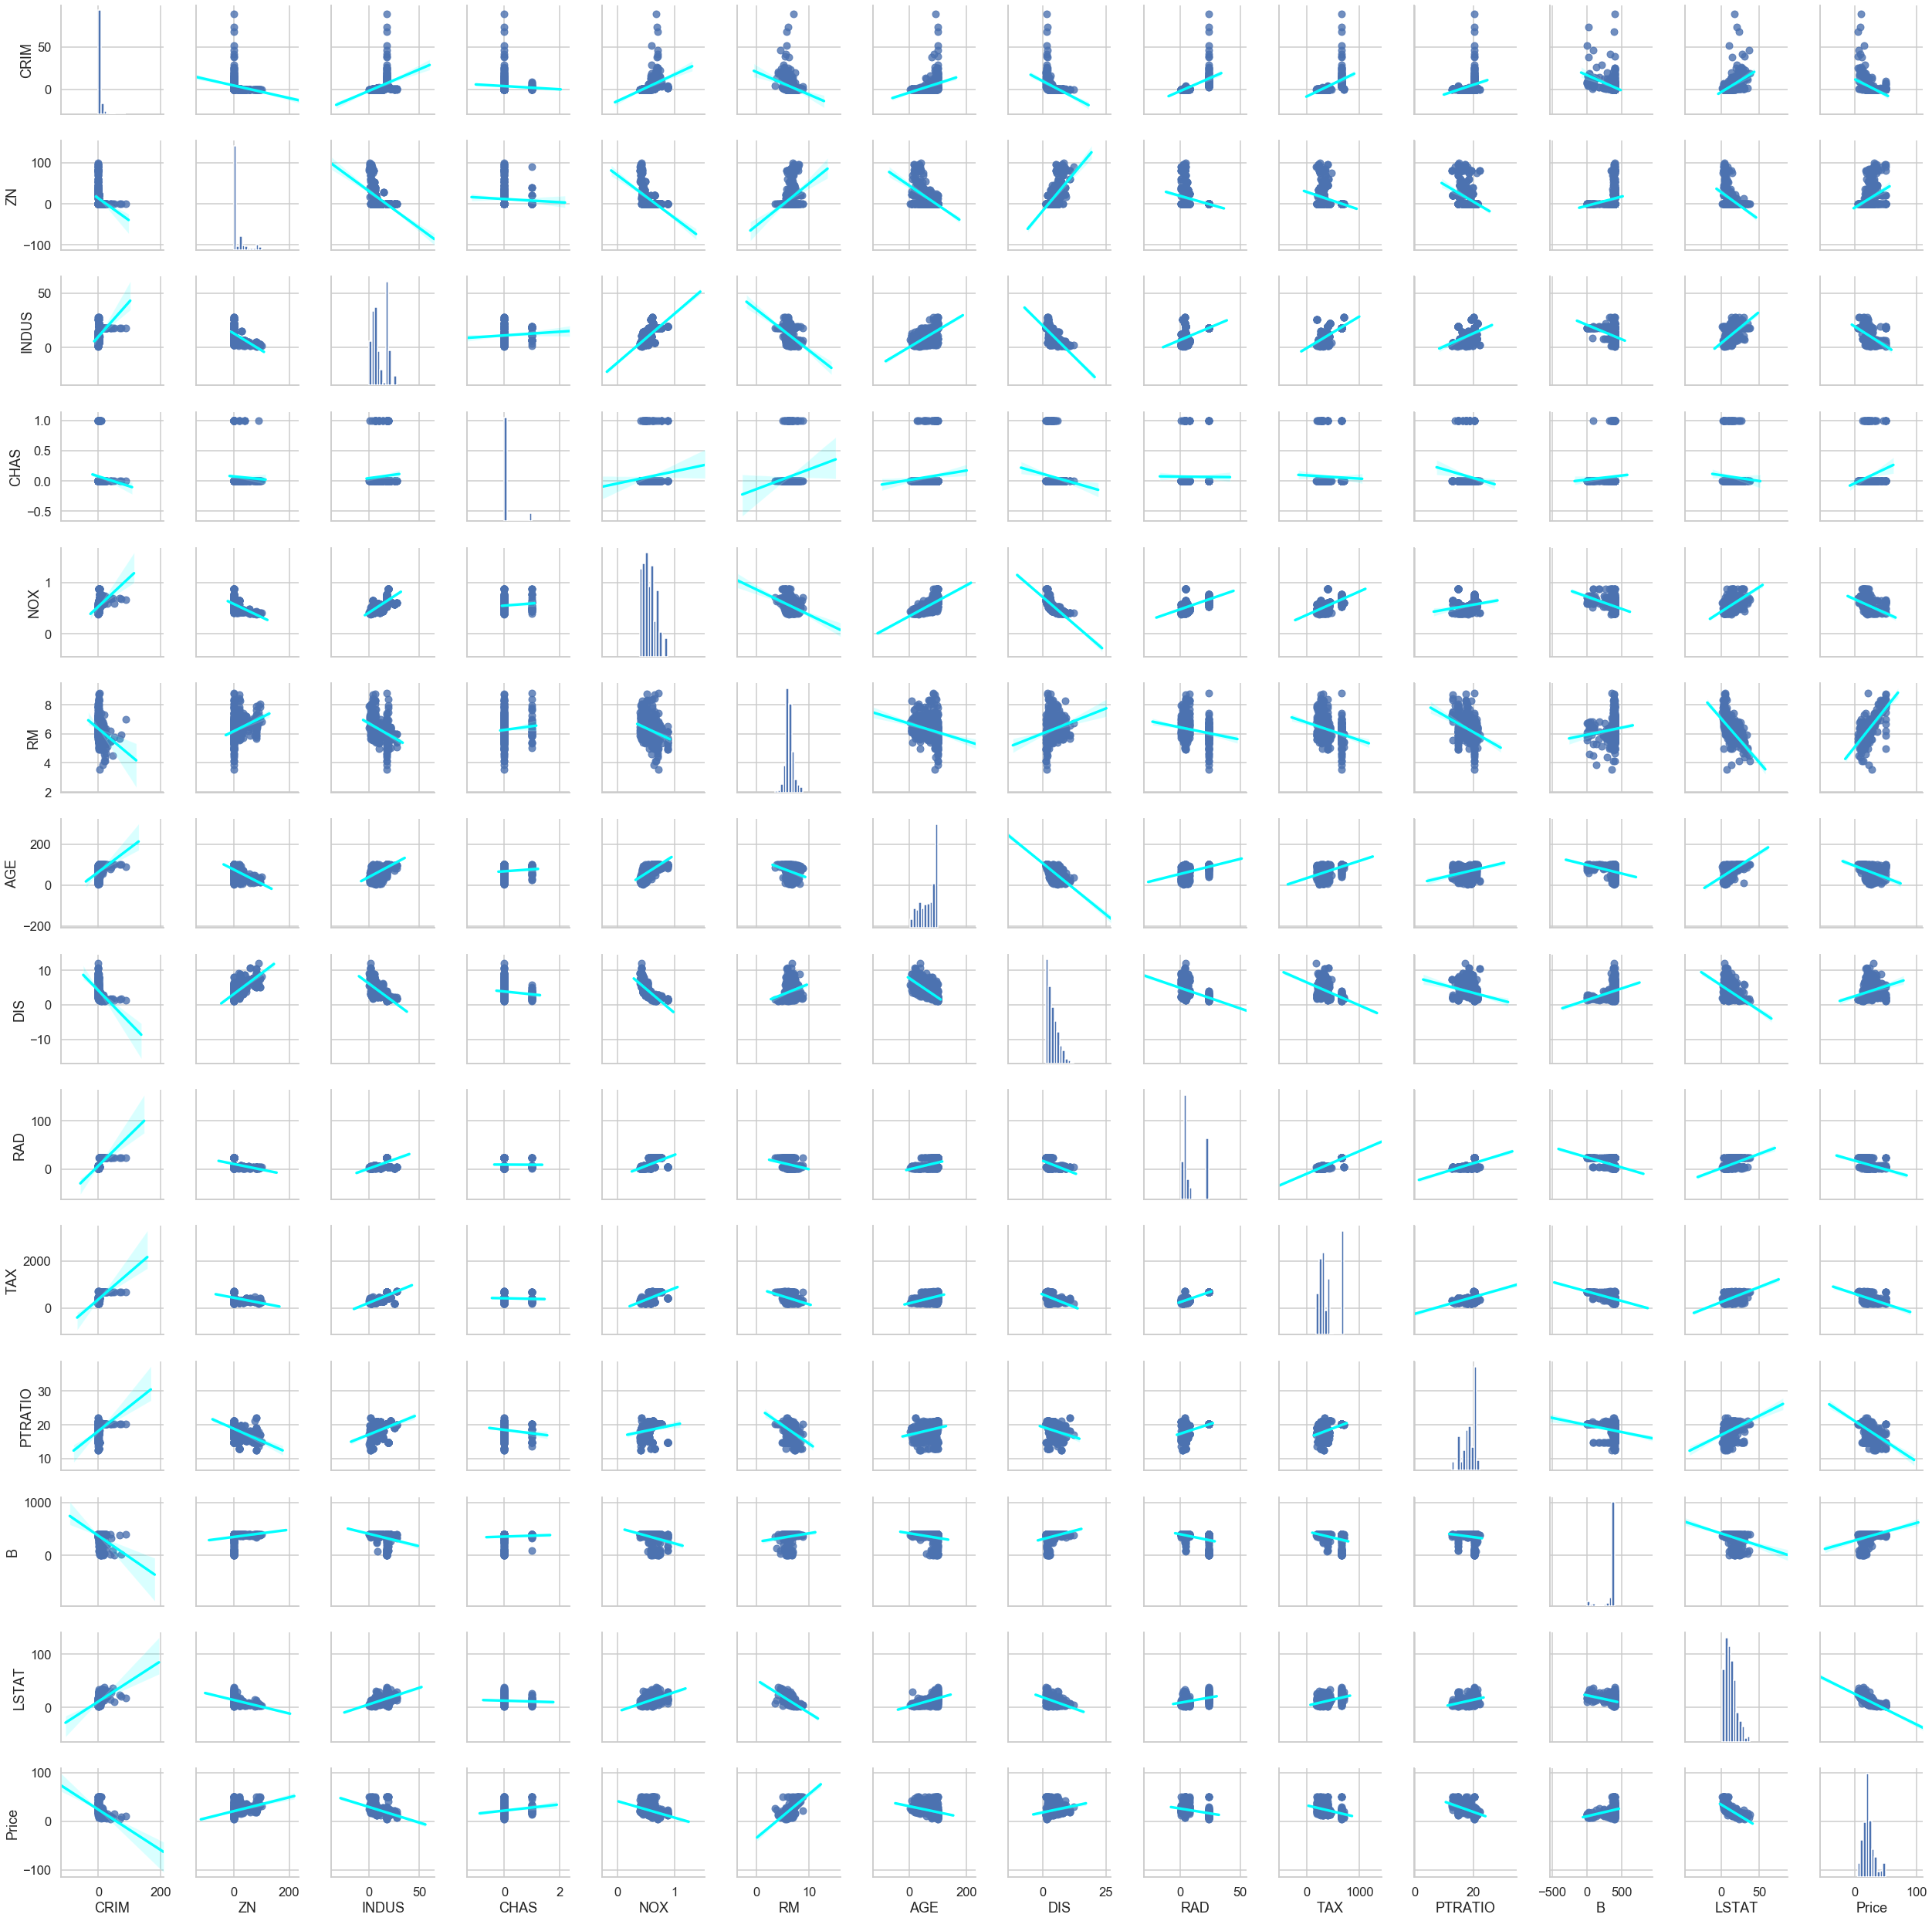

In [32]:
sns.pairplot(data , kind='reg' , plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

In [33]:
# Splitting the data btw training and test
features = data.drop('Price' , axis=1)
prices =data['Price']
X_train , X_test , y_train , y_test=train_test_split(features,prices, test_size=0.2 , random_state=10)


In [34]:
X_train.shape

(404, 13)

In [35]:
X_test.shape

(102, 13)

In [36]:
data.shape

(506, 14)

In [37]:
# Multivariable Regg

regr=LinearRegression()
regr.fit(X_train,y_train)
print(f'regression score for train data set : {regr.score(X_train,y_train)}')
print(f'regression score for test data set : {regr.score(X_test,y_test)}')
print('Intercept : ', regr.intercept_)
len(regr.coef_)
coeifficent=pd.DataFrame(data=regr.coef_ , index=features.columns)
coeifficent.columns=['coef']
coeifficent

regression score for train data set : 0.750121534530608
regression score for test data set : 0.6709339839115644
Intercept :  36.53305138282466


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [38]:
data['Price'].skew()

1.1080984082549072

In [39]:
logprice=np.log(data['Price'])

In [40]:
logprice.skew()

-0.33032129530987864

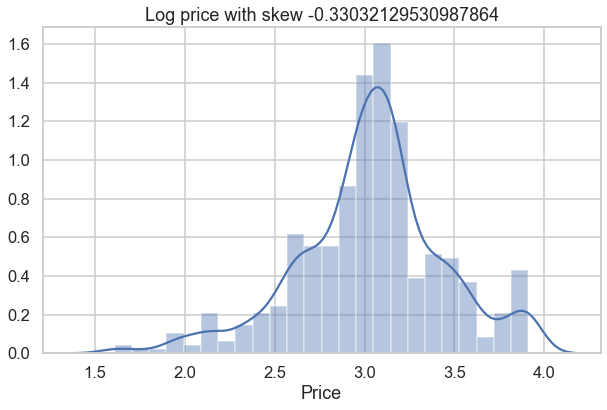

In [41]:
plt.figure(figsize=[10,6])
sns.distplot(logprice)
plt.title(f'Log price with skew {logprice.skew()}')
plt.show()

In [42]:
# creating new test and train data using the log price 

prices = np.log(data['Price']) # Use log prices
features = data.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.7930234826697584
Test data r-squared: 0.7446922306260731
Intercept 4.0599438717752


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [43]:
# now as we used log price so all the coeifficients are also in log inorder to get the actual value
#we need to used exponent feature of numpy  below is the example for CHAS

np.e**0.080331


1.0836456950439142

In [44]:
#calculating p value for which we need to import statsmodel

X_inc_const= sm.add_constant(X_train)
model=sm.OLS(y_train,X_inc_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     114.9
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          1.70e-124
Time:                        12:55:36   Log-Likelihood:                 111.88
No. Observations:                 404   AIC:                            -195.8
Df Residuals:                     390   BIC:                            -139.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0599      0.227     17.880      0.0

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [45]:
pd.DataFrame({"coef":results.params , "pvalue":round(results.pvalues,3)})

,coef,pvalue
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


In [46]:
# testing the Multicollinearity
# calculate VIF for the same import :   from statsmodels.stats.outliers_influence import variance_inflation_factor
# here calculated VIF for the col 1 only

variance_inflation_factor(exog=X_inc_const.values,exog_idx=1)



1.7145250443932485

In [47]:
X_inc_const.columns

Index(['const', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [48]:
X_inc_const.shape

(404, 14)

In [49]:
len(X_inc_const.columns)

14

In [50]:
vif_list=[variance_inflation_factor(exog=X_inc_const.values,exog_idx=i) for i in range(len(X_inc_const.columns))]

In [51]:
vif_list

[597.5487126763895,
 1.7145250443932485,
 2.3328224265597597,
 3.943448822674638,
 1.0788133385000578,
 4.410320817897635,
 1.840405307567858,
 3.3267660823099394,
 4.222923410477865,
 7.314299817005065,
 8.508856493040817,
 1.8399116326514053,
 1.338671325536472,
 2.812544292793036]

In [52]:
#creating the dataFrame:

pd.DataFrame({"coef":results.params , "pvalue":round(results.pvalues,3) ,"VIF":vif_list})

,coef,pvalue,VIF
const,4.059944,0.000,597.548713
CRIM,-0.010672,0.000,1.714525
ZN,0.001579,0.009,2.332822
INDUS,0.002030,0.445,3.943449
CHAS,0.080331,0.038,1.078813
NOX,-0.704068,0.000,4.410321
RM,0.073404,0.000,1.840405
AGE,0.000763,0.209,3.326766
DIS,-0.047633,0.000,4.222923
RAD,0.014565,0.000,7.314300


In [53]:
#checking BIC

X_inc_const=sm.add_constant(X_train)
model=sm.OLS(y_train,X_inc_const)
results=model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -139.74997769478898
r-squared is 0.7930234826697584


In [54]:
# removing INDUS

X_inc_const=sm.add_constant(X_train)
X_inc_const=X_inc_const.drop(['INDUS'],axis=1)
model=sm.OLS(y_train,X_inc_const)
results=model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -145.14508855591163
r-squared is 0.7927126289415163


In [55]:
# Reduced model #2 excluding INDUS and AGE
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -149.49934294224656
r-squared is 0.7918657661852815


In [56]:
frames=pd.concat([org_coef,coef_minus_indus,reduced_coef],axis=1)

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [57]:
frames

,coef,p-value,coef,p-value,coef,p-value
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
B,0.000516,0.000,0.000511,0.000,0.000518,0.000
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
LSTAT,-0.031390,0.000,-0.031262,0.000,-0.030271,0.000
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
PTRATIO,-0.034795,0.000,-0.034126,0.000,-0.033481,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


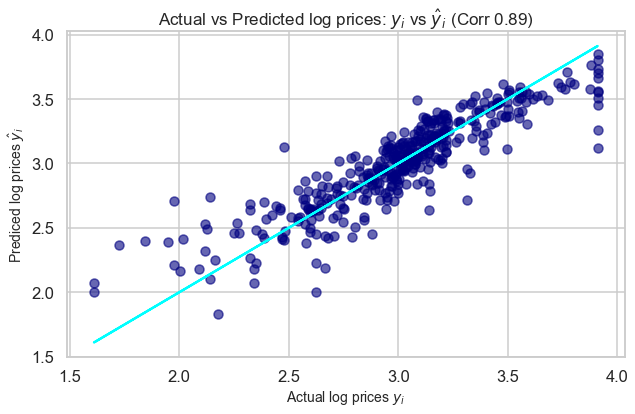

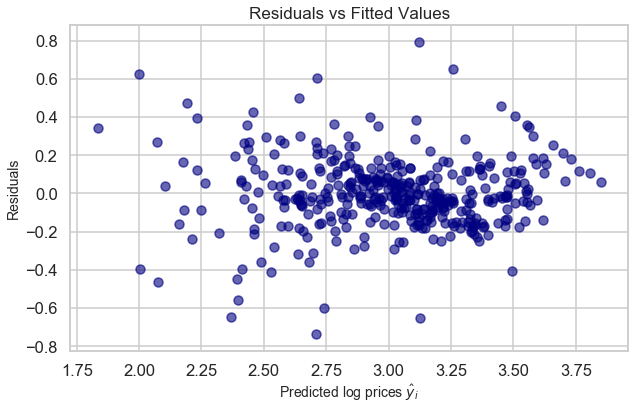

In [61]:
# Residuals and Residual plots

prices = np.log(data['Price']) # Use log prices
features = data.drop(['Price','INDUS','AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_inc_const=sm.add_constant(X_train)
model=sm.OLS(y_train,X_inc_const)
results=model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
# results.resid

# calculating the correlation btw the actual values and the prdeicted values there should be no pattern 
plt.figure(figsize=[10,6])
corr=round(y_train.corr(results.fittedvalues),3)
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Prediced log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()


plt.figure(figsize=[10,6])
# Residuals vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()


In [59]:
# calculating MSE and Rsquare

print("MSE",results.mse_resid)
print("totalMSE",results.mse_total)
print("r-sqared",results.rsquared)

MSE 0.03487337082354597
totalMSE 0.16297891794992306
r-sqared 0.7918657661852815


In [62]:
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

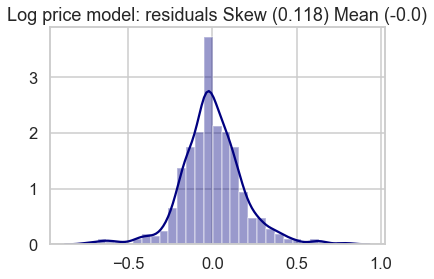

In [60]:
# checking for normality : normality is good
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='navy')
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In [63]:
print('1 s.d. in log prices is', np.sqrt(reduced_log_mse))
print('2 s.d. in log prices is', 2*np.sqrt(reduced_log_mse))

1 s.d. in log prices is 0.18708286933869708
2 s.d. in log prices is 0.37416573867739417


In [64]:
#eg for price 30,000
upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

The upper bound in log prices for a 95% prediction interval is  3.7753631203395495
The upper bound in normal prices is $ 43613.34233239937
The lower bound in log prices for a 95% prediction interval is  3.0270316429847615
The lower bound in normal prices is $ 20635.886906824155
